# Putting It Together

#### CS 5806

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [164]:
state_abbr_map = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 
                  'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
                  'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 
                  'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
                  'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 
                  'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
                  'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 
                  'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 
                  'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 
                  'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', \
                  'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [4]:
state_abb_subset = ['CA', 'FL', 'GA', 'IL', 'MI', 'NC', 'NY', 'OH', 'PA', 'TX', ]
state_subset = ['California', 'Florida', 'Georgia', 'Illinois', 'Michigan', 
                'North Carolina', 'New York', 'Ohio', 'Pennsylvania', 'Texas']

In [221]:
state_trends = pd.DataFrame()

for s in states:

    state_df = pd.read_csv("merged_csvs/" + s + "_trend_data.csv", index_col=0)
    state_df['State'] = [s] * len(state_df)

    state_trends = pd.concat([state_trends, state_df])

state_trends = state_trends.fillna(0).replace(np.inf, 1)
state_trends = state_trends.replace(state_abbr_map)


In [222]:
state_trends

,date,Ed Sheeran,Guns N' Roses,Coldplay,Metallica,The Rolling Stones,Pink,U2,Bruno Mars,State
0,2015-01-04,1.000000,0.154930,0.230769,0.243902,0.225352,0.148148,0.112676,0.485714,Alabama
1,2015-01-11,1.923077,0.150000,0.318182,0.434783,0.400000,0.000000,0.250000,1.400000,Alabama
2,2015-01-18,1.279070,0.287879,0.054054,0.236842,0.060606,0.160000,0.166667,1.151515,Alabama
3,2015-01-25,1.500000,0.070175,0.218750,0.303030,0.192982,0.116279,0.105263,0.857143,Alabama
4,2015-02-01,1.925926,0.179487,0.142857,0.272727,0.333333,0.275862,0.230769,1.736842,Alabama
...,...,...,...,...,...,...,...,...,...,...
256,2019-12-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,Wyoming
257,2019-12-08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,Wyoming
258,2019-12-15,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,Wyoming
259,2019-12-22,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Wyoming


In [223]:
artists = np.array(state_trends.columns[1:9])
artists

array(['Ed Sheeran', "Guns N' Roses", 'Coldplay', 'Metallica',
       'The Rolling Stones', 'Pink', 'U2', 'Bruno Mars'], dtype=object)

In [224]:
state_trends['date'] = pd.to_datetime(state_trends['date'])

In [225]:
def get_quarter(date):
    return str(date.year) + ":Q" + str(pd.Timestamp(date).quarter)

In [226]:
state_trends['Quarter'] = state_trends['date'].apply(get_quarter)
state_trends = state_trends.drop('date', axis=1)
state_trends

,Ed Sheeran,Guns N' Roses,Coldplay,Metallica,The Rolling Stones,Pink,U2,Bruno Mars,State,Quarter
0,1.000000,0.154930,0.230769,0.243902,0.225352,0.148148,0.112676,0.485714,Alabama,2015:Q1
1,1.923077,0.150000,0.318182,0.434783,0.400000,0.000000,0.250000,1.400000,Alabama,2015:Q1
2,1.279070,0.287879,0.054054,0.236842,0.060606,0.160000,0.166667,1.151515,Alabama,2015:Q1
3,1.500000,0.070175,0.218750,0.303030,0.192982,0.116279,0.105263,0.857143,Alabama,2015:Q1
4,1.925926,0.179487,0.142857,0.272727,0.333333,0.275862,0.230769,1.736842,Alabama,2015:Q1
...,...,...,...,...,...,...,...,...,...,...
256,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,Wyoming,2019:Q4
257,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,Wyoming,2019:Q4
258,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,Wyoming,2019:Q4
259,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Wyoming,2019:Q4


In [227]:
stacked_trends = state_trends.set_index(['State', 'Quarter']).stack().reset_index().rename(columns = {'level_2': 'Artist', 0: 'Trend Index'})
stacked_trends

,State,Quarter,Artist,Trend Index
0,Alabama,2015:Q1,Ed Sheeran,1.000000
1,Alabama,2015:Q1,Guns N' Roses,0.154930
2,Alabama,2015:Q1,Coldplay,0.230769
3,Alabama,2015:Q1,Metallica,0.243902
4,Alabama,2015:Q1,The Rolling Stones,0.225352
...,...,...,...,...
104395,Wyoming,2019:Q4,Metallica,0.000000
104396,Wyoming,2019:Q4,The Rolling Stones,0.000000
104397,Wyoming,2019:Q4,Pink,1.000000
104398,Wyoming,2019:Q4,U2,0.000000


In [229]:
quarterly_trends = stacked_trends.groupby(['State', 'Artist', 'Quarter']).agg(np.average).reset_index()
quarterly_trends

,State,Artist,Quarter,Trend Index
0,Alabama,Bruno Mars,2015:Q1,0.882361
1,Alabama,Bruno Mars,2015:Q2,0.556828
2,Alabama,Bruno Mars,2015:Q3,0.324614
3,Alabama,Bruno Mars,2015:Q4,0.226955
4,Alabama,Bruno Mars,2016:Q1,0.532066
...,...,...,...,...
7995,Wyoming,U2,2018:Q4,0.153846
7996,Wyoming,U2,2019:Q1,0.076923
7997,Wyoming,U2,2019:Q2,0.230769
7998,Wyoming,U2,2019:Q3,0.461538


In [230]:
avg_by_quarter = quarterly_trends[['State', 'Quarter', 'Trend Index']].groupby(['State', 'Quarter']).agg(np.average).reset_index()
avg_by_quarter

,State,Quarter,Trend Index
0,Alabama,2015:Q1,0.445034
1,Alabama,2015:Q2,0.495337
2,Alabama,2015:Q3,0.270065
3,Alabama,2015:Q4,0.246262
4,Alabama,2016:Q1,0.374800
...,...,...,...
995,Wyoming,2018:Q4,0.375000
996,Wyoming,2019:Q1,0.451923
997,Wyoming,2019:Q2,0.394231
998,Wyoming,2019:Q3,0.413462


<hr>

In [231]:
concert_gdp_df = pd.read_csv("Data/concert_and_economic_data.csv", index_col=0)

In [237]:
concert_gdp_df

,State,Quarter,GDP Growth,Count,Total Revenue
0,Alabama,2015:Q1,-0.366568,0.0,0.0
1,Alabama,2015:Q2,1.118762,0.0,0.0
2,Alabama,2015:Q3,0.423806,0.0,0.0
3,Alabama,2015:Q4,-0.552170,0.0,0.0
4,Alabama,2016:Q1,0.181265,0.0,0.0
...,...,...,...,...,...
1015,Wyoming,2018:Q4,0.864746,0.0,0.0
1016,Wyoming,2019:Q1,1.344903,0.0,0.0
1017,Wyoming,2019:Q2,1.022071,0.0,0.0
1018,Wyoming,2019:Q3,0.330360,0.0,0.0


In [238]:
gdp_subset = concert_gdp_df[concert_gdp_df['State'].isin(state_abbr_map.values())]
gdp_subset

,State,Quarter,GDP Growth,Count,Total Revenue
0,Alabama,2015:Q1,-0.366568,0.0,0.0
1,Alabama,2015:Q2,1.118762,0.0,0.0
2,Alabama,2015:Q3,0.423806,0.0,0.0
3,Alabama,2015:Q4,-0.552170,0.0,0.0
4,Alabama,2016:Q1,0.181265,0.0,0.0
...,...,...,...,...,...
1015,Wyoming,2018:Q4,0.864746,0.0,0.0
1016,Wyoming,2019:Q1,1.344903,0.0,0.0
1017,Wyoming,2019:Q2,1.022071,0.0,0.0
1018,Wyoming,2019:Q3,0.330360,0.0,0.0


In [239]:
def scatter_corr(x, y, title="Title", x_label="X", y_label="Y"):

    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    r = np.corrcoef(x, y)[1][0]
    print("Correlation Coefficient:", round(r, 3))

Correlation Coefficient: 0.175


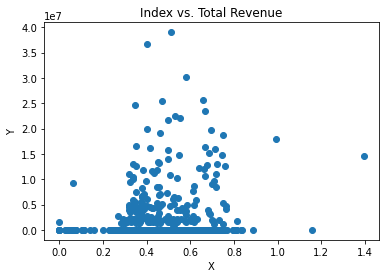

In [240]:
scatter_corr(avg_by_quarter['Trend Index'], gdp_subset['Total Revenue'], "Index vs. Total Revenue")

Correlation Coefficient: 0.142


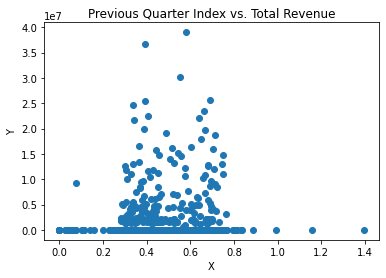

In [243]:
scatter_corr(avg_by_quarter['Trend Index'][:-1], gdp_subset['Total Revenue'][1:], "Previous Quarter Index vs. Total Revenue")

Correlation Coefficient: 0.047


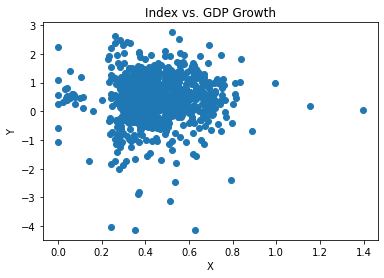

In [244]:
scatter_corr(avg_by_quarter['Trend Index'][:-1], gdp_subset['GDP Growth'][1:], "Index vs. GDP Growth")

<hr>

In [245]:
concerts = pd.read_csv("Data/concerts_with_quarter.csv", index_col=0)
concerts

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.),Quarter,Count
0,÷ Tour,Ed Sheeran,2017-06-29,Kansas City,Missouri,13382.0,1217313.0,2017:Q2,1.0
1,÷ Tour,Ed Sheeran,2017-06-30,Des Moines,Iowa,13375.0,1078939.0,2017:Q2,1.0
2,÷ Tour,Ed Sheeran,2017-07-01,Saint Paul,Minnesota,14938.0,1375063.0,2017:Q3,1.0
3,÷ Tour,Ed Sheeran,2017-07-09,Buffalo,New York,14305.0,1167095.0,2017:Q3,1.0
4,÷ Tour,Ed Sheeran,2017-07-11,Philadelphia,Pennsylvania,14461.0,1315130.0,2017:Q3,1.0
...,...,...,...,...,...,...,...,...,...
448,24K Magic World Tour,Bruno Mars,2018-11-08,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
449,24K Magic World Tour,Bruno Mars,2018-11-10,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
450,24K Magic World Tour,Bruno Mars,2018-11-11,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
451,24K Magic World Tour,Bruno Mars,2018-12-30,Las Vegas,Nevada,15121.0,2929784.0,2018:Q4,1.0


In [246]:
concerts_subset = concerts[concerts['State'].isin(state_abbr_map.values())]
concerts_subset

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.),Quarter,Count
0,÷ Tour,Ed Sheeran,2017-06-29,Kansas City,Missouri,13382.0,1217313.0,2017:Q2,1.0
1,÷ Tour,Ed Sheeran,2017-06-30,Des Moines,Iowa,13375.0,1078939.0,2017:Q2,1.0
2,÷ Tour,Ed Sheeran,2017-07-01,Saint Paul,Minnesota,14938.0,1375063.0,2017:Q3,1.0
3,÷ Tour,Ed Sheeran,2017-07-09,Buffalo,New York,14305.0,1167095.0,2017:Q3,1.0
4,÷ Tour,Ed Sheeran,2017-07-11,Philadelphia,Pennsylvania,14461.0,1315130.0,2017:Q3,1.0
...,...,...,...,...,...,...,...,...,...
448,24K Magic World Tour,Bruno Mars,2018-11-08,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
449,24K Magic World Tour,Bruno Mars,2018-11-10,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
450,24K Magic World Tour,Bruno Mars,2018-11-11,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
451,24K Magic World Tour,Bruno Mars,2018-12-30,Las Vegas,Nevada,15121.0,2929784.0,2018:Q4,1.0


In [208]:
concerts_with_trends = concerts_subset.merge(quarterly_trends, on=['State', 'Quarter', 'Artist'])

In [188]:
def prev_quarter(quarter):

    q = int(quarter[-1:])
    y = int(quarter[:4])
   
    if q == 1:
        prev_q = 4
        prev_y = y - 1
    else:
        prev_q = q - 1
        prev_y = y
    
    return str(prev_y) + ":Q" + str(prev_q) 

In [206]:
def add_prev_quarter(row):

    artist = row['Artist']
    current_quarter = row['Quarter']
    state = row['State']

    prev_q = prev_quarter(current_quarter)

    prev_index = quarterly_trends[(quarterly_trends['Artist'] == artist) & 
                         (quarterly_trends['Quarter'] == prev_q) &
                         (quarterly_trends['State'] == state)]['Trend Index']
    
    row['Previous Quarter Index'] = prev_index.values[0]

    return row

In [210]:
concerts_with_trends = concerts_with_trends.apply(add_prev_quarter, axis=1)

In [216]:
test_df = concerts_with_trends.dropna()

Correlation Coefficient: -0.223


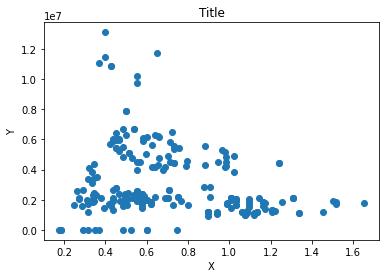

In [254]:
scatter_corr(test_df['Previous Quarter Index'], test_df['Revenue (Avg.)'])

In [270]:
X = test_df[['Previous Quarter Index', 'Trend Index']]
y = test_df['Attendance (Avg.)']

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X, y)

mean_squared_error(lin_reg.predict(X), y) ** 0.5

16324.816079867676

In [273]:
test_df.describe()

,Attendance (Avg.),Revenue (Avg.),Count,Trend Index,Previous Quarter Index
count,232.000000,2.320000e+02,232.0,232.000000,232.000000
mean,24862.189655,3.067443e+06,1.0,0.795885,0.702215
std,16924.639834,2.330866e+06,0.0,0.328308,0.312702
min,0.000000,0.000000e+00,1.0,0.000000,0.178421
25%,13896.500000,1.689986e+06,1.0,0.584502,0.464812
50%,15551.500000,2.115983e+06,1.0,0.725104,0.603207
75%,41109.250000,4.431101e+06,1.0,1.033020,0.979386
max,64442.000000,1.311332e+07,1.0,1.643087,1.651049


RMSE is less than one SD when predicting Attendance

In [276]:
2.3e6

test_df['Revenue (Avg.)'].describe()

count    2.320000e+02
mean     3.067443e+06
std      2.330866e+06
min      0.000000e+00
25%      1.689986e+06
50%      2.115983e+06
75%      4.431101e+06
max      1.311332e+07
Name: Revenue (Avg.), dtype: float64

In [284]:
populations = pd.read_csv("Data/state_populations.csv")

In [285]:
test_with_populations = test_df.merge(populations)

In [289]:
X = test_with_populations[['Previous Quarter Index', 'Trend Index', '2020 Population']]
y = test_with_populations['Revenue (Avg.)']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

mean_squared_error(lin_reg.predict(X), y) ** 0.5

2201673.263397945

Correlation Coefficient: 0.061


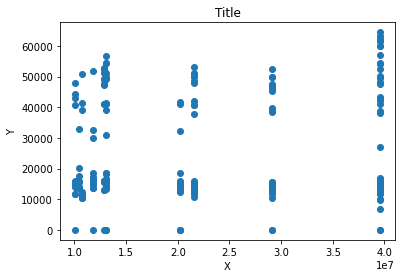

In [294]:
scatter_corr(test_with_populations['2020 Population'], test_with_populations['Attendance (Avg.)'])

In [298]:
from sklearn.ensemble import BaggingRegressor

X = test_with_populations[['Previous Quarter Index', 'Trend Index', '2020 Population']]
y = test_with_populations['Attendance (Avg.)']

bagged_lin_reg = BaggingRegressor(LinearRegression(), n_estimators=10)
bagged_lin_reg.fit(X, y)


mean_squared_error(bagged_lin_reg.predict(X), y) ** 0.5

16277.396319678146

In [302]:
X = avg_by_quarter[['Trend Index']]
y = gdp_subset['GDP Growth']

In [304]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

mean_squared_error(lin_reg.predict(X), y) ** 0.5

0.75454502484598

In [305]:
gdp_subset.describe()

,GDP Growth,Count,Total Revenue
count,1000.000000,1000.00000,1.000000e+03
mean,0.436205,0.44600,1.296920e+06
std,0.754950,1.23475,3.962147e+06
min,-4.133798,0.00000,0.000000e+00
25%,0.106842,0.00000,0.000000e+00
50%,0.489704,0.00000,0.000000e+00
75%,0.870058,0.00000,0.000000e+00
max,2.752765,15.00000,3.902714e+07
